In [34]:
import pandas as pd

In [35]:
# load data
df = pd.read_csv("energy_emissions.csv")

In [36]:
df.columns

Index(['Substance', 'ISO', 'Country', 'nuts2', 'NUTS 2 desc', 'Sector', 'year',
       'co2_energy', 'country', 'gas', 'oil', 'renewables', 'solid_fossil',
       'solid_fuels', 'fossil_share', 'renewable_share', 'coal_share',
       'co2_growth', 'delta_renewables', 'delta_coal', 'coal_lockin'],
      dtype='object')

In [37]:
# redenumire coloane pentru a avea acelas nume pentru merge

df = df.rename(columns={
    "nuts2": "geo",
    "year": "time"
})

In [38]:
# renuntam la coloanele in plus

df = df[[
    "geo",
    "time",
    "co2_energy",
    "co2_growth",
    "Country"
]]


In [39]:
df.head()
df.columns


Index(['geo', 'time', 'co2_energy', 'co2_growth', 'Country'], dtype='object')

In [40]:
df_co2 = df.copy()


In [41]:
df_co2.to_csv("energy_emissions_clean.csv", index=False)


In [42]:

df_socio_eco = pd.read_csv("nuts2_gdp_pc.csv")


In [43]:
df_socio_eco.columns


Index(['geo', 'time', 'gfcf_over_gdp', 'gerd_over_gdp', 'hightech_emp_share',
       'gdp_pc', 'industry_emp_share'],
      dtype='object')

In [44]:
# merge tabele pe geo si an

df_panel_full = df_socio_eco.merge(
    df_co2,
    on=["geo", "time"],
    how="inner"
)


In [45]:
print("Socio-economic:", df_socio_eco.shape)
print("CO2:", df_co2.shape)
print("Merged:", df_panel_full.shape)

df_panel_full.head()
df_panel_full.columns


Socio-economic: (4239, 7)
CO2: (2244, 5)
Merged: (962, 10)


Index(['geo', 'time', 'gfcf_over_gdp', 'gerd_over_gdp', 'hightech_emp_share',
       'gdp_pc', 'industry_emp_share', 'co2_energy', 'co2_growth', 'Country'],
      dtype='object')

In [46]:
# verificare acoperire temporala
df_panel_full["time"].min(), df_panel_full["time"].max()


(np.int64(2008), np.int64(2022))

In [47]:
import numpy as np

df_panel_full["log_co2_energy"] = np.log(df_panel_full["co2_energy"])
df_panel_full["log_gdp_pc"] = np.log(df_panel_full["gdp_pc"])


In [48]:
X_vars = [
    "log_gdp_pc",
    "gfcf_over_gdp",
    "gerd_over_gdp",
    "hightech_emp_share",
    "industry_emp_share"
]

y_var = "log_co2_energy"


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [50]:
df_panel_full.describe()


,time,gfcf_over_gdp,gerd_over_gdp,hightech_emp_share,gdp_pc,industry_emp_share,co2_energy,co2_growth,log_co2_energy,log_gdp_pc
count,962.000000,962.000000,962.000000,962.000000,9.620000e+02,962.000000,962.000000,962.000000,962.000000,962.000000
mean,2015.270270,0.382069,0.025108,0.985503,2.845160e+05,0.021451,4761.772793,-0.007171,7.577457,11.328247
std,4.275834,0.200201,0.021611,0.213525,6.829989e+05,0.007110,7046.356012,0.478101,1.474471,1.322831
min,2008.000000,0.100087,0.001435,0.512591,1.236550e+04,0.004545,12.628300,-0.958559,2.535940,9.422665
25%,2012.000000,0.239336,0.009563,0.855282,3.282520e+04,0.016758,770.531964,-0.088745,6.647080,10.398952
50%,2015.000000,0.326400,0.018513,0.949556,5.279304e+04,0.022241,2057.911571,-0.023966,7.629447,10.874135
75%,2019.000000,0.460153,0.032787,1.055993,1.438275e+05,0.026172,5385.059950,0.034889,8.591381,11.876369
max,2022.000000,1.261773,0.116072,2.185182,7.374950e+06,0.038818,38545.830870,13.947057,10.559603,15.813600


In [51]:
df_panel_full.groupby("geo").size().describe()


count    68.000000
mean     14.147059
std       2.117903
min       7.000000
25%      15.000000
50%      15.000000
75%      15.000000
max      15.000000
dtype: float64

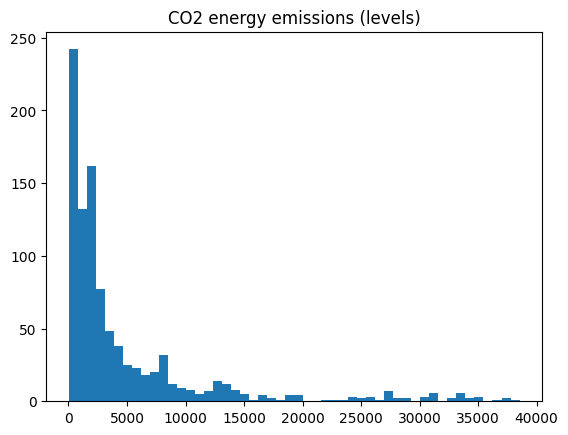

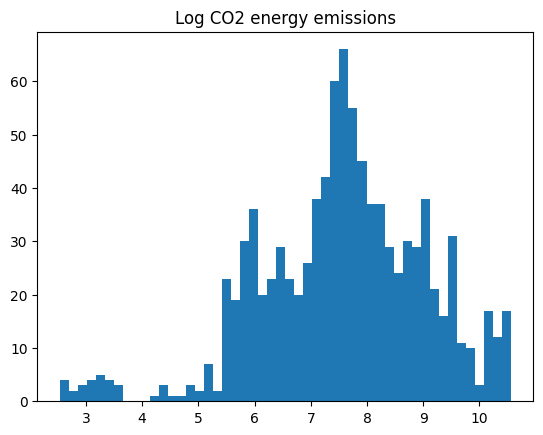

In [52]:
# Distributii (inainte si după log)
plt.hist(df_panel_full["co2_energy"], bins=50)
plt.title("CO2 energy emissions (levels)")
plt.show()

plt.hist(df_panel_full["log_co2_energy"], bins=50)
plt.title("Log CO2 energy emissions")
plt.show()


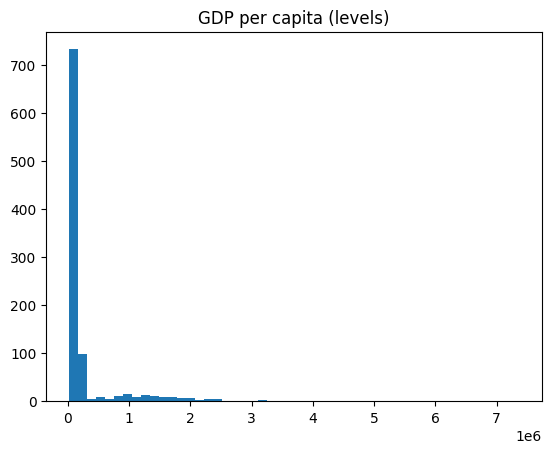

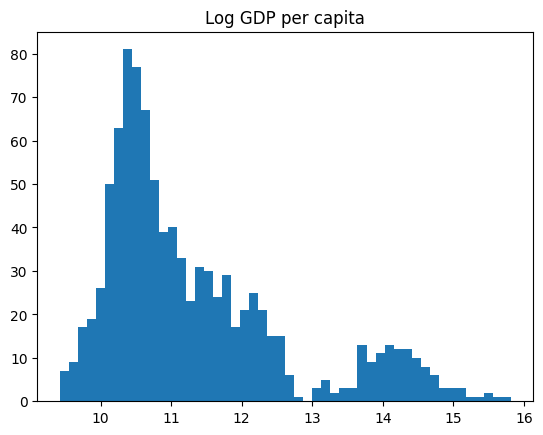

In [53]:
# Distributii (inainte si după log)
plt.hist(df_panel_full["gdp_pc"], bins=50)
plt.title("GDP per capita (levels)")
plt.show()

plt.hist(df_panel_full["log_gdp_pc"], bins=50)
plt.title("Log GDP per capita")
plt.show()


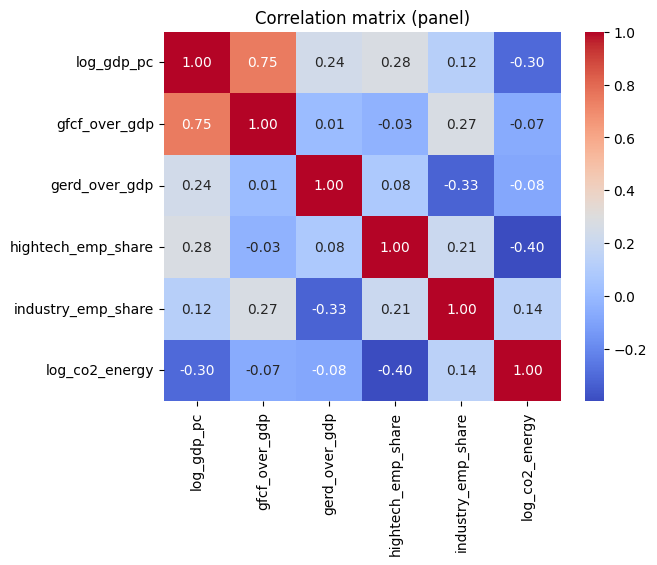

In [54]:
vars_corr = [
    "log_gdp_pc",
    "gfcf_over_gdp",
    "gerd_over_gdp",
    "hightech_emp_share",
    "industry_emp_share",
    "log_co2_energy"
]

corr = df_panel_full[vars_corr].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation matrix (panel)")
plt.show()


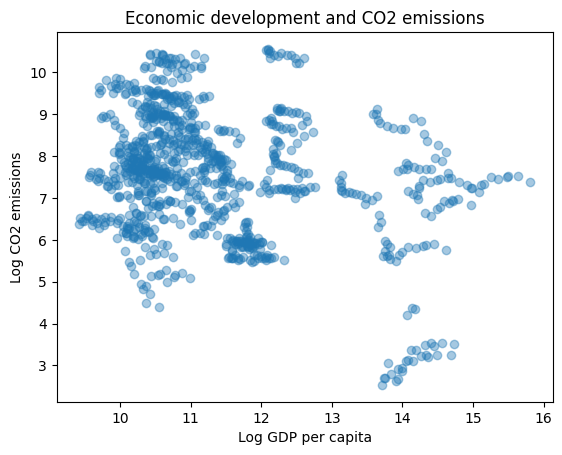

In [55]:
plt.scatter(df_panel_full["log_gdp_pc"],
            df_panel_full["log_co2_energy"],
            alpha=0.4)
plt.xlabel("Log GDP per capita")
plt.ylabel("Log CO2 emissions")
plt.title("Economic development and CO2 emissions")
plt.show()


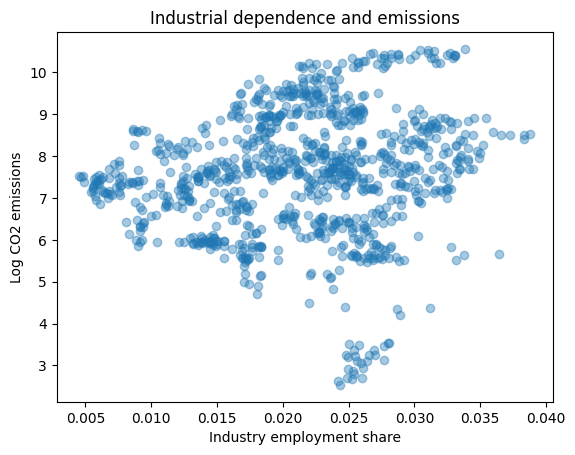

In [56]:
plt.scatter(df_panel_full["industry_emp_share"],
            df_panel_full["log_co2_energy"],
            alpha=0.4)
plt.xlabel("Industry employment share")
plt.ylabel("Log CO2 emissions")
plt.title("Industrial dependence and emissions")
plt.show()


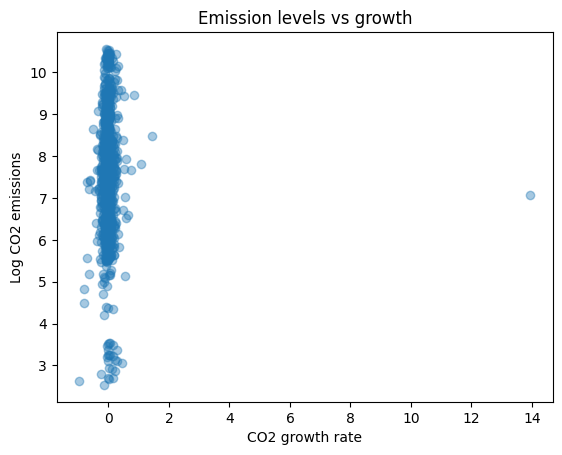

In [57]:
plt.scatter(df_panel_full["co2_growth"],
            df_panel_full["log_co2_energy"],
            alpha=0.4)
plt.xlabel("CO2 growth rate")
plt.ylabel("Log CO2 emissions")
plt.title("Emission levels vs growth")
plt.show()


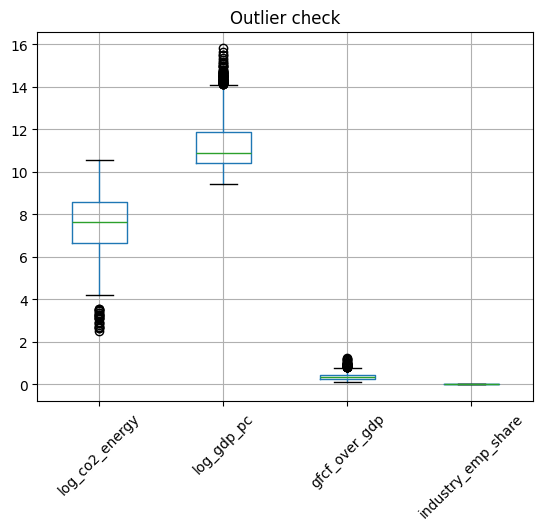

In [58]:
df_panel_full[[
    "log_co2_energy",
    "log_gdp_pc",
    "gfcf_over_gdp",
    "industry_emp_share"
]].boxplot(rot=45)
plt.title("Outlier check")
plt.show()


In [60]:
df_panel_full.to_csv("nuts2_panel_final.csv", index=False)


In [61]:
# 1. Calculăm creșterea (dacă nu o ai deja într-o coloană separată)
# Folosim groupby('geo') pentru a nu calcula diferența între țări diferite
df_panel_full['co2_growth_check'] = df_panel_full.groupby('geo')['log_co2_energy'].diff()

# 2. Filtrăm rândurile unde creșterea este suspect de mare (peste 10)
outlier_row = df_panel_full[df_panel_full['co2_growth_check'] > 10]

# 3. Afișăm rezultatul: Regiunea, Anul și Valoarea
print(outlier_row[['geo', 'time', 'log_co2_energy', 'co2_growth_check']])

Empty DataFrame
Columns: [geo, time, log_co2_energy, co2_growth_check]
Index: []


In [62]:
# Replicăm calculul "greșit" care a generat graficul inițial
# Fără groupby, comparăm mere cu pere între țări
df_panel_full['growth_artifact'] = df_panel_full['log_co2_energy'].diff()

# Acum sigur vom găsi acel 14
fake_outlier = df_panel_full[df_panel_full['growth_artifact'] > 10]

print("Aici este eroarea de trecere între țări:")
print(fake_outlier[['geo', 'time', 'log_co2_energy', 'growth_artifact']])

Aici este eroarea de trecere între țări:
Empty DataFrame
Columns: [geo, time, log_co2_energy, growth_artifact]
Index: []


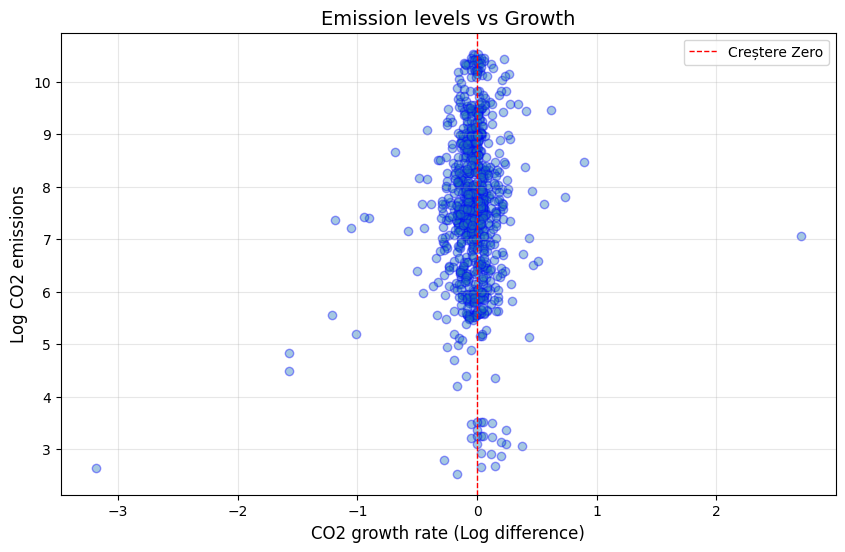

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calculăm creșterea corectă (folosind groupby pentru a nu amesteca țările)
df_panel_full['co2_growth_rate'] = df_panel_full.groupby('geo')['log_co2_energy'].diff()

# 2. Creăm graficul
plt.figure(figsize=(10, 6))

# Folosim un scatter plot simplu
plt.scatter(
    x=df_panel_full['co2_growth_rate'], 
    y=df_panel_full['log_co2_energy'], 
    alpha=0.4,  # Transparența ajută să vedem unde se suprapun multe puncte
    edgecolors='b' # Opțional: contur pentru puncte
)

plt.title('Emission levels vs Growth', fontsize=14)
plt.xlabel('CO2 growth rate (Log difference)', fontsize=12)
plt.ylabel('Log CO2 emissions', fontsize=12)

# Adăugăm o linie verticală la 0 pentru referință (creștere zero)
plt.axvline(x=0, color='red', linestyle='--', linewidth=1, label='Creștere Zero')
plt.legend()

plt.grid(True, alpha=0.3)
plt.show()

--- Analiză Statistică grupată după: Country ---
Număr de grupuri calificate (> 8 observații): 12
Test Levene p-value: 0.0000
-> Variante inegale (sau distributie non-normala). Trecem la Kruskal-Wallis.

REZULTAT Kruskal-Wallis:
Statistică = 324.5784
P-value    = 5.7315e-63

CONCLUZIE: Există diferente semnificative statistic intre tari/regiuni!


C:\Users\User\AppData\Local\Temp\ipykernel_19008\1908200232.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=group_col, y=target_col, data=df_plot, order=order_plot, palette="viridis")


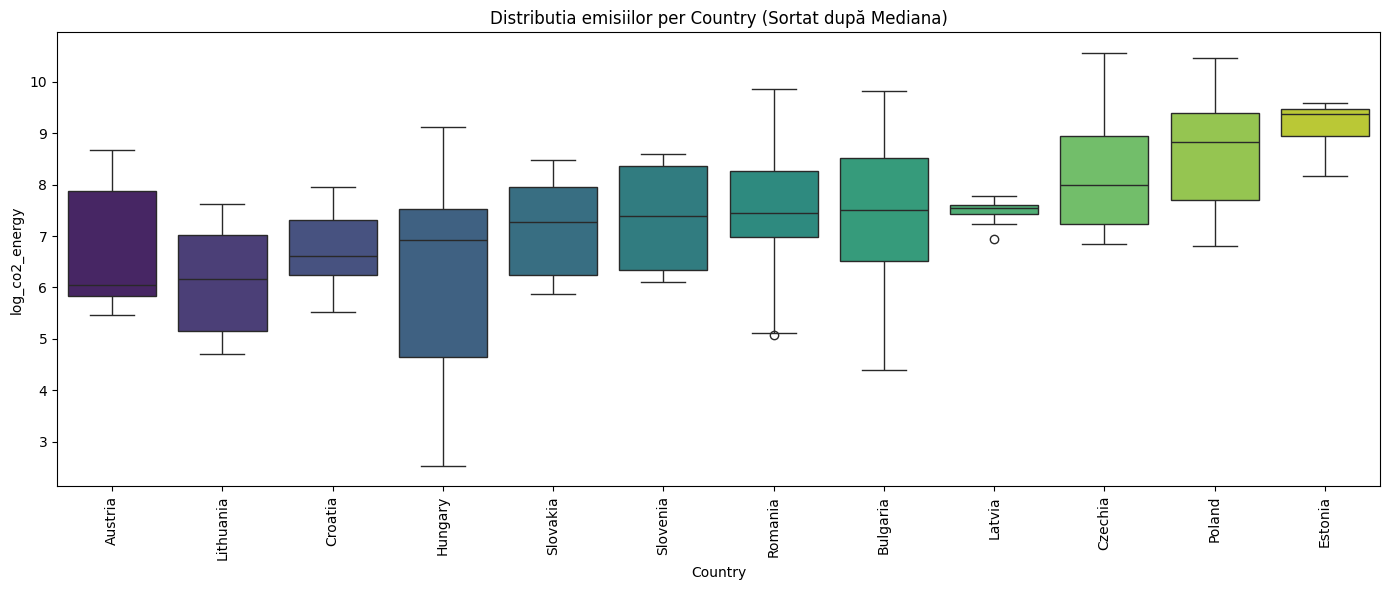

In [69]:
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# nivel de analiza - tara
group_col = 'Country'  

target_col = 'log_co2_energy' 
# -------------------

print(f"--- Analiză Statistică grupată după: {group_col} ---")

#  Pregatirea datelor
groups = []
group_labels = []

# Filtram grupurile care au prea putine date pentru a fi relevante statistic
min_samples = 8 

for name, group in df_panel_full.groupby(group_col):
    data = group[target_col].dropna().values
    if len(data) >= min_samples:
        groups.append(data)
        group_labels.append(name)

print(f"Număr de grupuri calificate (> {min_samples} observații): {len(groups)}")

# Verificarea Ipotezelor (Normality & Homogeneity)
# Testul Levene pentru egalitatea variantelor
stat_lev, p_lev = stats.levene(*groups)
print(f"Test Levene p-value: {p_lev:.4f}")

# Decidem testul
if p_lev > 0.05:
    print("-> Variante egale. Încercam ANOVA.")
    f_stat, p_val = stats.f_oneway(*groups)
    test_name = "ANOVA (One-way)"
else:
    print("-> Variante inegale (sau distributie non-normala). Trecem la Kruskal-Wallis.")
    f_stat, p_val = stats.kruskal(*groups)
    test_name = "Kruskal-Wallis"

# 3. Rezultate
print(f"\nREZULTAT {test_name}:")
print(f"Statistică = {f_stat:.4f}")
print(f"P-value    = {p_val:.4e}")

if p_val < 0.05:
    print("\nCONCLUZIE: Există diferente semnificative statistic intre tari/regiuni!")
    

    plt.figure(figsize=(14, 6))
    
    # Sortam grupurile după mediana pentru a face graficul lizibil
    order = df_panel_full.groupby(group_col)[target_col].median().sort_values().index
    
    # Daca sunt prea multe regiuni (NUTS2), afisam doar primele si ultimele 20
    if len(order) > 40:
        print("Prea multe grupuri pentru afișare completă. Afisam Top/Bottom 15.")
        top_bottom = list(order[:15]) + list(order[-15:])
        df_plot = df_panel_full[df_panel_full[group_col].isin(top_bottom)]
        order_plot = top_bottom
    else:
        df_plot = df_panel_full
        order_plot = order

    sns.boxplot(x=group_col, y=target_col, data=df_plot, order=order_plot, palette="viridis")
    plt.xticks(rotation=90)
    plt.title(f'Distributia emisiilor per {group_col} (Sortat după Mediana)')
    plt.tight_layout()
    plt.show()

else:
    print("\nCONCLUZIE: Nu exista diferente semnificative statistic.")

In [70]:
import statsmodels.formula.api as smf

# --- MODEL ECONOMETRIC: Fixed Effects (LSDV) ---

# Formula: Log Emisii ~ Log PIB + Structura Industriei + Efecte de Tara
# "C(Country)" creeaza automat variabile dummy pentru fiecare tara (Fixed Effects)
formula = "log_co2_energy ~ log_gdp_pc + industry_emp_share + C(Country)"


model = smf.ols(formula=formula, data=df_panel_full).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         log_co2_energy   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     43.28
Date:                Wed, 17 Dec 2025   Prob (F-statistic):           1.02e-86
Time:                        14:19:55   Log-Likelihood:                -1513.9
No. Observations:                 962   AIC:                             3056.
Df Residuals:                     948   BIC:                             3124.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [ ]:
# Extragem doar coeficientii si P-values pentru variabilele economice
interes = ['log_gdp_pc', 'industry_emp_share']

print("--- REZULTATE CHEIE ---")
for var in interes:
    try:
        coef = model.params[var]
        pval = model.pvalues[var]
        conf_int = model.conf_int().loc[var]
        
        print(f"\nVariabila: {var}")
        print(f"  -> Coeficient (Impact): {coef:.4f}")
        print(f"  -> P-value (Semnificatie): {pval:.4e}")
        print(f"  -> Interval de incredere (95%): [{conf_int[0]:.4f}, {conf_int[1]:.4f}]")
        
        if pval < 0.05:
            print("  -> CONCLUZIE: Impact Semnificativ Statistic!")
        else:
            print("  -> CONCLUZIE: Nu are impact semnificativ statistic.")

    except KeyError:
        print(f"\nVariabila '{var}' nu a fost gasita în model. Verifică numele exact.")

--- REZULTATE CHEIE ---

Variabila: log_gdp_pc
  -> Coeficient (Impact): -0.1436
  -> P-value (Semnificatie): 1.8286e-01
  -> Interval de incredere (95%): [-0.3550, 0.0678]
  -> CONCLUZIE: Nu are impact semnificativ statistic.

Variabila: industry_emp_share
  -> Coeficient (Impact): 27.7461
  -> P-value (Semnificatie): 4.5139e-05
  -> Interval de incredere (95%): [14.4606, 41.0316]
  -> CONCLUZIE: Impact Semnificativ Statistic!


In [74]:
# Verificam daca tarile bogate au mai putina industrie
corelatie = df_panel_full[['log_gdp_pc', 'industry_emp_share']].corr()
print("Matricea de corelatie:")
print(corelatie)


Matricea de corelatie:
                    log_gdp_pc  industry_emp_share
log_gdp_pc            1.000000            0.123646
industry_emp_share    0.123646            1.000000


--- Analiză Statistică grupată după: geo ---
Număr de grupuri calificate (> 8 observații): 65
Test Levene p-value: 0.0000
-> Variante inegale (sau distributie non-normala). Trecem la Kruskal-Wallis.

REZULTAT Kruskal-Wallis:
Statistică = 890.9027
P-value    = 5.9151e-146

CONCLUZIE: Există diferente semnificative statistic intre regiuni (geo)!
Prea multe grupuri pentru afișare completă. Afisam Top 15 (cele mai mici) si Bottom 15 (cele mai mari).


C:\Users\User\AppData\Local\Temp\ipykernel_19008\67442694.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=group_col, y=target_col, data=df_plot, order=order_plot, palette="viridis")


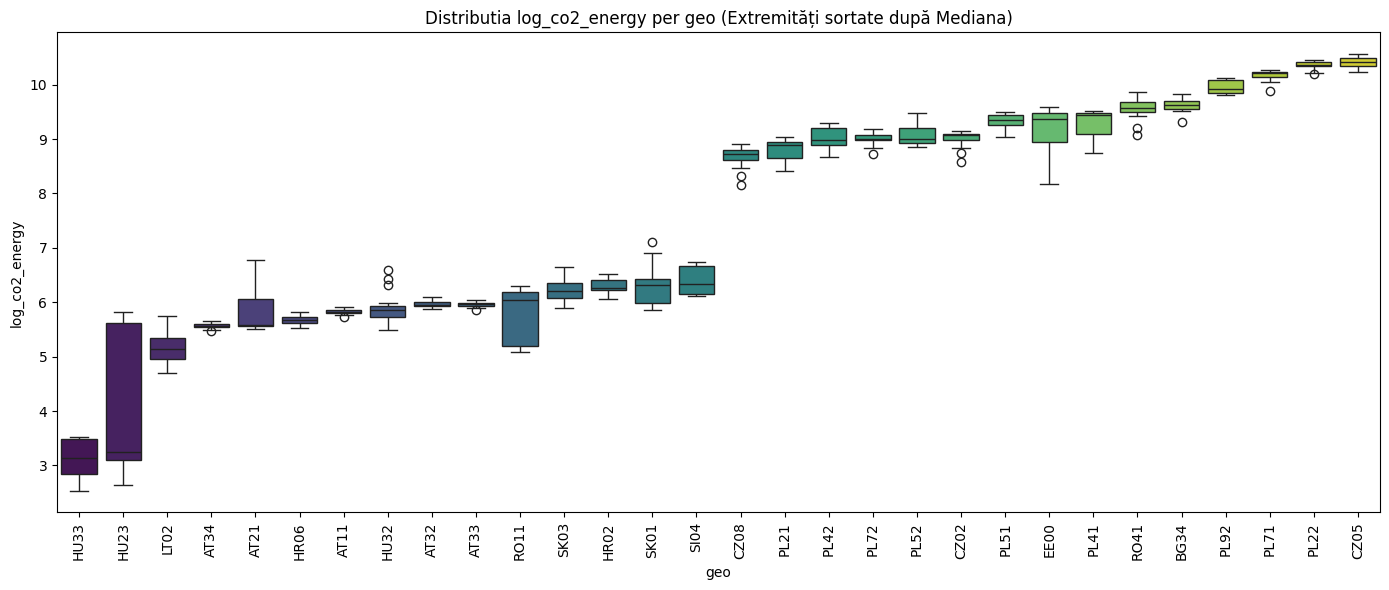

In [75]:
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


group_col = 'geo'  

# Variabila pe care o analizam (am pus industria, dar poți schimba)
target_col = 'log_co2_energy'
# -------------------

print(f"--- Analiză Statistică grupată după: {group_col} ---")

# 1. Pregatirea datelor
groups = []
group_labels = []

# Filtram grupurile care au prea putine date pentru a fi relevante statistic
min_samples = 8 

# Iterăm prin fiecare regiune (geo)
for name, group in df_panel_full.groupby(group_col):
    data = group[target_col].dropna().values
    if len(data) >= min_samples:
        groups.append(data)
        group_labels.append(name)

print(f"Număr de grupuri calificate (> {min_samples} observații): {len(groups)}")

# Verificarea Ipotezelor (Normality & Homogeneity)
# Testul Levene pentru egalitatea variantelor
stat_lev, p_lev = stats.levene(*groups)
print(f"Test Levene p-value: {p_lev:.4f}")

# Decidem testul
if p_lev > 0.05:
    print("-> Variante egale. Încercam ANOVA.")
    f_stat, p_val = stats.f_oneway(*groups)
    test_name = "ANOVA (One-way)"
else:
    print("-> Variante inegale (sau distributie non-normala). Trecem la Kruskal-Wallis.")
    f_stat, p_val = stats.kruskal(*groups)
    test_name = "Kruskal-Wallis"

# Rezultate
print(f"\nREZULTAT {test_name}:")
print(f"Statistică = {f_stat:.4f}")
print(f"P-value    = {p_val:.4e}")

if p_val < 0.05:
    print(f"\nCONCLUZIE: Există diferente semnificative statistic intre regiuni ({group_col})!")
    
    plt.figure(figsize=(14, 6))
    
    # Sortam grupurile dupa mediana pentru a face graficul lizibil
    order = df_panel_full.groupby(group_col)[target_col].median().sort_values().index
    
    # LOGICA SPECIALA PENTRU GEO:
    # Fiindca sunt multe regiuni (NUTS2), afisam doar primele si ultimele 15
    if len(order) > 40:
        print("Prea multe grupuri pentru afișare completă. Afisam Top 15 (cele mai mici) si Bottom 15 (cele mai mari).")
        top_bottom = list(order[:15]) + list(order[-15:])
        df_plot = df_panel_full[df_panel_full[group_col].isin(top_bottom)]
        order_plot = top_bottom
    else:
        df_plot = df_panel_full
        order_plot = order

    sns.boxplot(x=group_col, y=target_col, data=df_plot, order=order_plot, palette="viridis")
    plt.xticks(rotation=90)
    plt.title(f'Distributia {target_col} per {group_col} (Extremități sortate după Mediana)')
    plt.tight_layout()
    plt.show()

else:
    print("\nCONCLUZIE: Nu exista diferente semnificative statistic.")

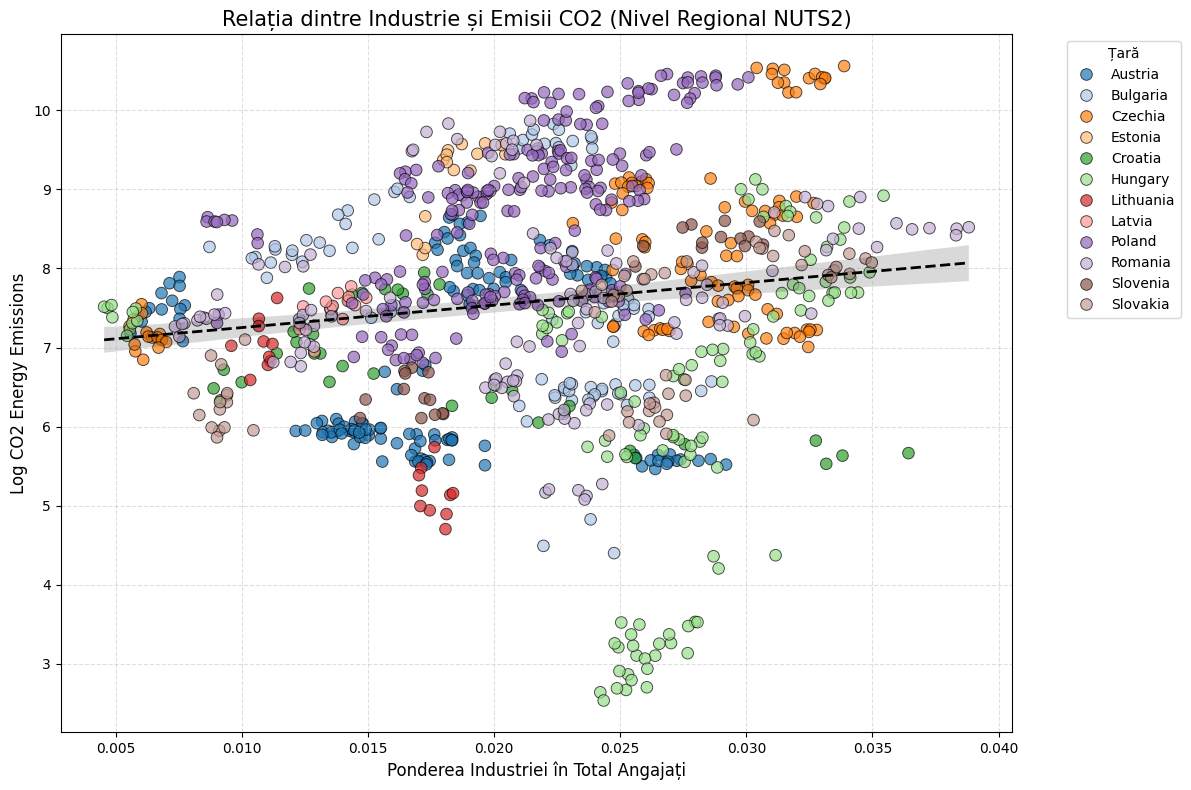

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


if 'Country' not in df_panel_full.columns:
    df_panel_full['Country'] = df_panel_full['geo'].str[:2]

# Configurare grafic
plt.figure(figsize=(12, 8))

# Scatter Plot (Punctele)
sns.scatterplot(
    data=df_panel_full,
    x='industry_emp_share', 
    y='log_co2_energy', 
    hue='Country',        
    palette='tab20',     
    s=70,                
    alpha=0.7,           
    edgecolor='k'        
)

# Adaugam o linie de regresie (Trendline) globala
# Aceasta ne arata trendul general: creste poluarea odata cu industria?
sns.regplot(
    data=df_panel_full, 
    x='industry_emp_share', 
    y='log_co2_energy', 
    scatter=False,       
    color='black',       
    line_kws={"linestyle": "--", "linewidth": 2} 
)

plt.title('Relația dintre Industrie și Emisii CO2 (Nivel Regional NUTS2)', fontsize=15)
plt.xlabel('Ponderea Industriei în Total Angajați', fontsize=12)
plt.ylabel('Log CO2 Energy Emissions', fontsize=12)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Țară')

plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()